In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.linalg
pd.options.mode.chained_assignment = None

In [95]:
df = pd.read_csv("Data3.csv")
df

,U0,I,U
0,12.12,0.25,12.120
1,12.12,0.50,12.110
2,12.12,0.75,12.090
3,12.12,1.00,12.080
4,12.12,1.25,12.070
5,12.12,1.50,12.050
6,12.12,1.75,12.044
7,12.12,2.00,12.030
8,4.50,0.10,4.300
9,4.50,0.20,3.900


In [96]:
expData = df[df.U0 == 12.12]
batteryData = df[df.U0 == 4.5]

In [97]:
expData

,U0,I,U
0,12.12,0.25,12.120
1,12.12,0.50,12.110
2,12.12,0.75,12.090
3,12.12,1.00,12.080
4,12.12,1.25,12.070
5,12.12,1.50,12.050
6,12.12,1.75,12.044
7,12.12,2.00,12.030


In [98]:
basis = np.vstack((expData.I,np.ones(len(expData)))).T
koef = scipy.linalg.lstsq(basis, expData.U)[0]
print(koef)

[-0.05190476 12.13264286]


In [99]:
x0 = -koef[1]/koef[0]
print(x0)

233.74816513762258


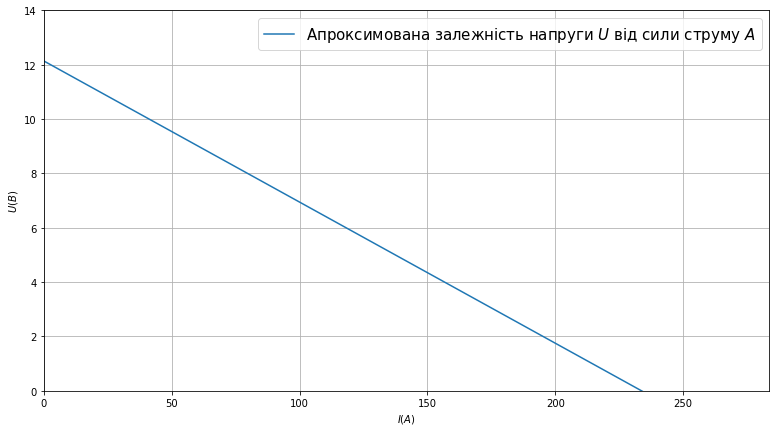

In [100]:
plt.figure(figsize = (13,7))
plt.ylabel("$U(В)$")
plt.rc('font', size=15)
plt.xlabel("$I(A)$")
plt.grid();


x = np.arange(0, x0 + 1,0.01)
y = koef[0] * x + koef[1]

plt.xlim(0,x0 + 50)
plt.ylim(0, 14)

plt.plot(x, y, '-', label = r"Апроксимована залежність напруги $U$ від сили струму $А$")
plt.legend(loc="best");

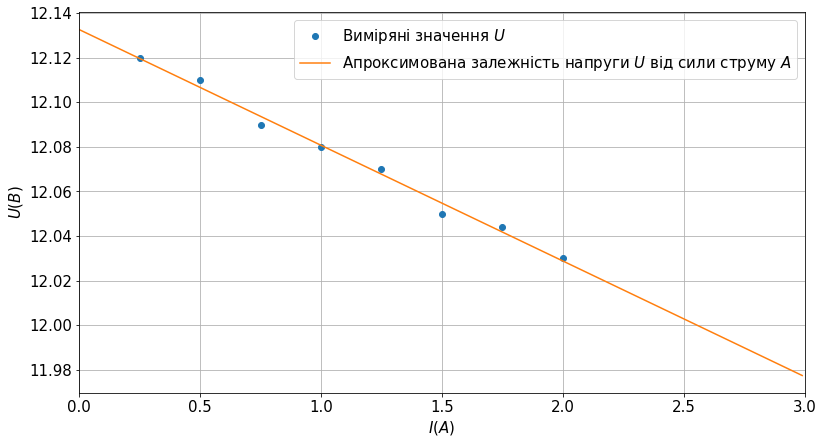

In [101]:
plt.figure(figsize = (13,7))
plt.ylabel("$U(В)$")
plt.rc('font', size=15)
plt.xlabel("$I(A)$")
plt.grid();


x = np.arange(0, max(expData.I) + 1,0.01)
y = koef[0] * x + koef[1]

plt.xlim(0,3)

plt.plot(expData.I, expData.U, 'o', label = r"Виміряні значення $U$")
plt.plot(x, y, '-', label = r"Апроксимована залежність напруги $U$ від сили струму $А$")
plt.legend(loc="best");

In [102]:
batteryData

,U0,I,U
8,4.5,0.10,4.30
9,4.5,0.20,3.90
10,4.5,0.30,3.70
11,4.5,0.40,3.30
12,4.5,0.50,2.90
13,4.5,0.60,2.70
14,4.5,0.75,2.25


In [103]:
batteryData['Re'] = batteryData.apply(lambda row: row['U'] / row['I'], axis=1)
batteryData['Ri'] = batteryData.apply(lambda row: (row['U0'] - row['I']*row['Re']) / row['I'], axis=1)
batteryData['Pi'] = batteryData.apply(lambda row: row['I']**2 * row['Ri'], axis=1)
batteryData['Pe'] = batteryData.apply(lambda row: row['I']**2 * row['Re'], axis = 1)
batteryData['P0'] = batteryData.apply(lambda row: row['U0']**2 / row['Ri'], axis = 1)
batteryData['Iz'] = batteryData.apply(lambda row: row['U0'] / row['Ri'], axis = 1)
batteryData['Pe0'] = batteryData.apply(lambda row: row['Pe'] / row['P0'], axis = 1)
batteryData['Pi0'] = batteryData.apply(lambda row: row['Pi'] / row['P0'] , axis = 1)
batteryData['PP0'] = batteryData.apply(lambda row: (row['Pi'] + row['Pe']) / row['P0'] , axis = 1)
batteryData['n'] = batteryData.apply(lambda row: row['Pe0'] * 100, axis = 1)
batteryData

,U0,I,U,Re,Ri,Pi,Pe,P0,Iz,Pe0,Pi0,PP0,n
8,4.5,0.10,4.30,43.000000,2.000000,0.0200,0.4300,10.125000,2.25000,0.042469,0.001975,0.044444,4.246914
9,4.5,0.20,3.90,19.500000,3.000000,0.1200,0.7800,6.750000,1.50000,0.115556,0.017778,0.133333,11.555556
10,4.5,0.30,3.70,12.333333,2.666667,0.2400,1.1100,7.593750,1.68750,0.146173,0.031605,0.177778,14.617284
11,4.5,0.40,3.30,8.250000,3.000000,0.4800,1.3200,6.750000,1.50000,0.195556,0.071111,0.266667,19.555556
12,4.5,0.50,2.90,5.800000,3.200000,0.8000,1.4500,6.328125,1.40625,0.229136,0.126420,0.355556,22.913580
13,4.5,0.60,2.70,4.500000,3.000000,1.0800,1.6200,6.750000,1.50000,0.240000,0.160000,0.400000,24.000000
14,4.5,0.75,2.25,3.000000,3.000000,1.6875,1.6875,6.750000,1.50000,0.250000,0.250000,0.500000,25.000000


In [104]:
basis = np.vstack((batteryData.I,np.ones(len(batteryData)))).T
koef = scipy.linalg.lstsq(basis, batteryData.U)[0]
print(koef)

[-3.1624714   4.58043478]


In [105]:
x0 = -koef[1]/koef[0]
print(x0)

1.4483719247467446


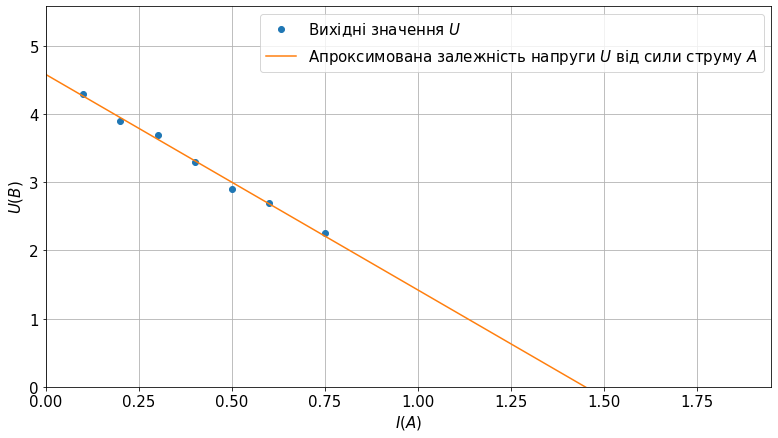

In [106]:
plt.figure(figsize = (13,7))
plt.ylabel("$U(В)$")
plt.rc('font', size=15)
plt.xlabel("$I(A)$")
plt.grid();


x = np.arange(0, x0 + 1,0.01)
y = koef[0] * x + koef[1]

#plt.axis('scaled')
plt.xlim(0,x0 + 0.5)
plt.ylim(0, np.max(y) + 1)

plt.plot(batteryData.I, batteryData.U, 'o', label = r"Вихідні значення $U$")
plt.plot(x, y, '-', label = r"Апроксимована залежність напруги $U$ від сили струму $А$")
plt.legend(loc="best");

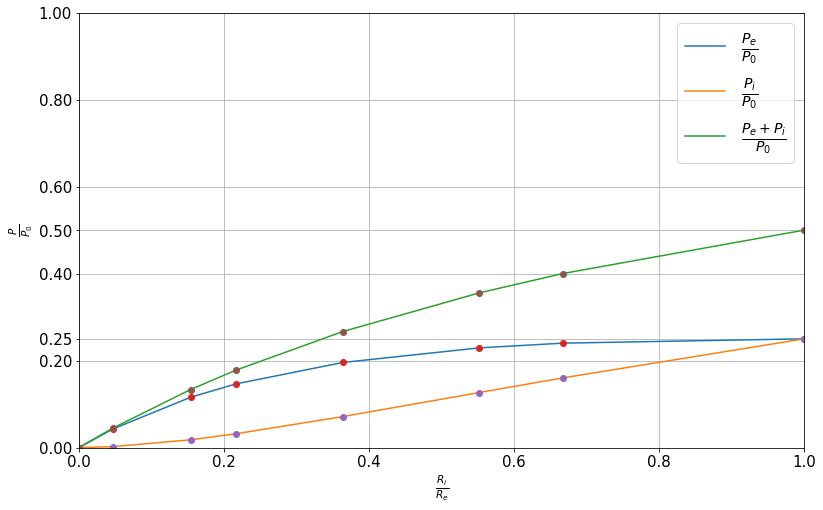

In [107]:
plt.figure(figsize = (13,8))
plt.ylabel(r"$\frac{P}{P_0}$")
plt.rc('font', size=20)
plt.xlabel(r"$\frac{R_i}{R_e}$")
plt.grid();


#plt.axis('scaled')
plt.xlim(left=0)
plt.ylim(0, np.max(batteryData['PP0'])+ 0.5)

from scipy.interpolate import make_interp_spline, BSpline

plt.yticks([0, 0.2, 0.25, 0.4, 0.5, 0.6, 0.8, 1])

x = [0]
y = [0]
z = [0]
u = [0]
x = np.append(x, batteryData.apply(lambda row: row['Ri'] / row['Re'], axis = 1))
y = np.append(y, batteryData['Pe0'])
z = np.append(z, batteryData['Pi0'])
u = np.append(u, batteryData['PP0'])

#plt.plot(batteryData.I, batteryData.U, 'o', label = r"Вихідні значення $U$")
plt.plot(x, y, '-', label = r"$\frac{P_e}{P_0}$")
plt.plot(x, z, '-', label = r"$\frac{P_i}{P_0}$")
plt.plot(x, u, '-', label = r"$\frac{P_e+P_i}{P_0}$")
plt.plot(x, y, 'o')
plt.plot(x, z, 'o')
plt.plot(x, u, 'o')
plt.legend(loc="best");